<a href="https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/hc_pinn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/Arif-PhyChem/trace_conservation/blob/main/hc_pinn.ipynb)

In [1]:
import sys
import os

! git clone https://github.com/Arif-PhyChem/MLQD.git

fatal: destination path 'MLQD' already exists and is not an empty directory.


In [3]:
# install the required packages

! pip install tensorflow --upgrade
! pip install sklearn
! pip install hyperopt

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
# Add MLQD's path to system path

mlqd_dir='MLQD/dev_ver'
sys.path.append(mlqd_dir)

from evolution import quant_dyn



In [5]:
# get training and test data files from github
! git clone https://github.com/Arif-PhyChem/trace_conservation.git

fatal: destination path 'trace_conservation' already exists and is not an empty directory.


# Physics Informed Neural Networks (PINNs) with uncertainity-aware hard coded (HC) trace constraint

In the case of PINNs (Physics-Informed Neural Networks), physical constraints are integrated into the loss function through an additional loss term, $\mathcal{L}_\text{Tr}$, which penalizes deviations from trace conservation. Although PINNs significantly improve trace conservation compared to purely data-driven NNs, they can still exhibit minor violations. This is because the physical constraints in the PINNs loss function are typically considered "soft." In simpler terms, PINNs are encouraged to satisfy the constraints during training, but these constraints are not strictly enforced.

To overcome the limitations of PINNs, we employ a novel approach that enforces trace conservation by design. This approach utilizes a U-aware HC (uncertainty-aware hard-coded) constraint, guaranteeing strict adherence to physical laws during simulations. Unlike PINNs, the U-aware HC constraint operates independently of the loss function, allowing for a more direct and rigorous enforcement of the trace conservation law, thereby rectifying potential violations during the simulation process.

To facilitate the training process, we provide pre-prepared training files named 'x.npy' and 'y.npy'. However, if you wish to create your own training files, you can use the MLQD tool, available on GitHub at [MLQD GitHub](https://github.com/Arif-PhyChem/MLQD), in conjunction with the SB dataset from the QD3SET-1 database, which can be accessed via this [DOI link](https://doi.org/10.25452/figshare.plus.c.6389553).

## PINN model with U-aware HC constraint for SB model with MLQD

For quick run, we are setting training epochs 'TrEpochs' to 10, you should set it to a higher number for better training. The uncertainty-aware HC constraint is integrated with priors set as $(p_1, p_2) = (0, 1)$.




In [5]:
# sb training files (x and y) for unconstrained NN
! ls trace_conservation/training_data/sb/hc_pinn

x.npy  y_1.npy	y.npy


In [9]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD

#Training for prior 0

param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/sb/hc_pinn/x',  # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/sb/hc_pinn/y',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'pinn': 'True',   # model is physics-informed
      'prior': 0,
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'SB',
      'QDmodelOut': 'hc_sb_model_0'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

# Training for prior 1 (You can optimize model by providing 'hyperParam': True)
param={
    'n_states': 2,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'trace_conservation/training_data/sb/hc_pinn/x',  # str: (Optional) The prepared X file
      'YfileIn': 'trace_conservation/training_data/sb/hc_pinn/y_1',  # str: (Optional) The prepared Y file
      'hyperParam': 'False',  # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'pinn': 'True',   # model is physics-informed
      'prior': 1,
      'patience': 30,
      'OptEpochs': 10,
      'TrEpochs': 10,
      'max_evals': 10,
      'systemType': 'SB',
      'QDmodelOut': 'hc_sb_model_1'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

## Test for a test trajectory.

In [10]:
# test tarjectory
! ls trace_conservation/test_data/sb/

2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy


In [11]:
# Here we are using MLQD for dynamics prediction, later we will calculate the
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
xx = np.load('trace_conservation/test_data/sb/2_epsilon-0.0_Delta-1.0_lambda-0.2_gamma-10.0_beta-0.75.npy')
x = xx[0:41,1:]

param={
    'n_states': 2,
    'time': 10,
      'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'XfileIn': x,           # str: (Optional) The prepared X file will be saved at the provided file name
      'cons_trace': 'True',
      'systemType': 'SB', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
      'QDmodelIn':  'hc_sb_model_0.keras, hc_sb_model_1.keras',    # str: (Optional), providing a name to save the model at
      'QDtrajOut': 'hc_sb_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 162, 80)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 162, 110)            │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 162, 80)             │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 81, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │         207,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,442 (1.01 MB)

 Trainable params: 265,442 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

         Model # 2        


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)                   │ (None, 162, 80)             │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 162, 110)            │          26,510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 162, 80)             │          26,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 81, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6480)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │         207,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,442 (1.01 MB)

 Trainable params: 265,442 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

ml_dyn.RCDYN: Running recursive dynamics with CNN model......
ml_dyn.RCDYN: Dynamics is saved in a file  "hc_sb_traj"
ml_dyn.RCDYN: Time taken = 33.246665716171265 sec
No reference trajectory was provided, so dynamics is not plotted. You can provide reference trajectory with "refTraj"
MLQD is ended at 2024-06-19 07:30:23.998861


Text(0.5, 1.0, 'Trace in the case of symmetric SB model using PINN with U-aware HC constraint')

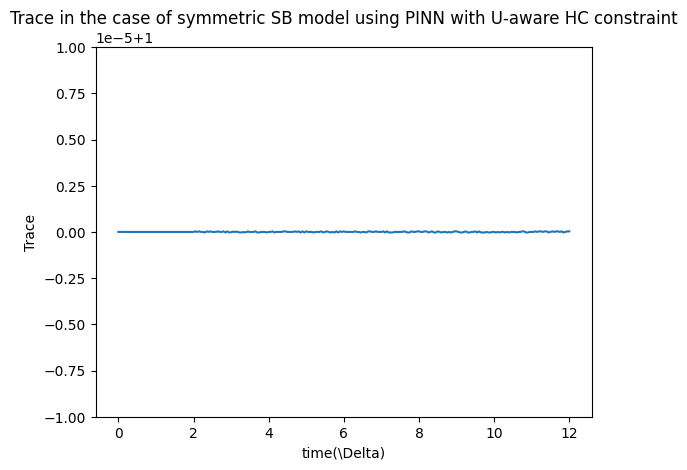

In [15]:
# Plot trace vs time
x = np.load('hc_sb_traj.npy')
trace = np.real(x[:,1] + x[:,4])

plt.plot(x[:,0], trace)
plt.xlabel('time(\Delta)')
plt.ylabel('Trace')
plt.ylim(0.99999, 1.00001)
plt.title('Trace in the case of symmetric SB model using PINN with U-aware HC constraint')

# Let's do it for FMO complex

In [16]:
## As the datasize is quite large, we have provided at Zenodo
! wget --content-disposition https://zenodo.org/records/12065848/files/training_data.zip?download=1

--2024-06-19 07:33:40--  https://zenodo.org/records/12065848/files/training_data.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219716862 (210M) [application/octet-stream]
Saving to: ‘training_data.zip’

training_data.zip   100%[===================>] 209.54M  25.4MB/s    in 9.3s    

2024-06-19 07:34:04 (22.5 MB/s) - ‘training_data.zip’ saved [219716862/219716862]



In [17]:
! unzip training_data

Archive:  training_data.zip
   creating: training_data/fmo/
   creating: training_data/fmo/hc_pinn/
  inflating: training_data/fmo/hc_pinn/x.npy  
  inflating: training_data/fmo/hc_pinn/y.npy  
  inflating: training_data/fmo/hc_pinn/y_1.npy  
   creating: training_data/fmo/physics_agnostic/
   creating: training_data/fmo/physics_agnostic/site_1/
  inflating: training_data/fmo/physics_agnostic/site_1/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_1/y.npy  
   creating: training_data/fmo/physics_agnostic/site_2/
  inflating: training_data/fmo/physics_agnostic/site_2/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_2/y.npy  
   creating: training_data/fmo/physics_agnostic/site_3/
  inflating: training_data/fmo/physics_agnostic/site_3/x.npy  
  inflating: training_data/fmo/physics_agnostic/site_3/y.npy  
   creating: training_data/fmo/physics_agnostic/site_4/
  inflating: training_data/fmo/physics_agnostic/site_4/x.npy  
  inflating: training_data/fmo/physics_agno

In [18]:
!ls

hc_sb_model_0.keras  hc_sb_traj.npy  sample_data	 training_data
hc_sb_model_1.keras  MLQD	     trace_conservation  training_data.zip


In [ ]:
# input for MLQD package, more details are given at https://github.com/Arif-PhyChem/MLQD

# Training for prior 0
param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'training_data/fmo/hc_pinn/x',           # str: (Optional) The prepared X file
      'YfileIn': 'training_data/fmo/hc_pinn/y',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'prior': 0,
      'pinn': 'True',
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO',
      'QDmodelOut': 'hc_fmo_model_0'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

# Training for prior 1 (You can optimize model by providing 'hyperParam': True)
param={
    'n_states': 7,
      'QDmodel': 'createQDmodel',     # str: create QD model. The dafault option is useQDmodel
      'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
      'prepInput' : 'False',           # str: Prepare input files from the data (Default 'False')
      'XfileIn': 'training_data/fmo/hc_pinn/x',           # str: (Optional) The prepared X file
      'YfileIn': 'training_data/fmo/hc_pinn/y_1',           # str: (Optional) The prepared Y file
      'hyperParam': 'False',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default values)
      'prior': 1,
      'pinn': 'True',
      'patience': 30,
      'OptEpochs': 30,
      'TrEpochs': 10,
      'max_evals': 30,
      'systemType': 'FMO',
      'QDmodelOut': 'hc_fmo_model_1'    # str: (Optional), providing a name to save the model at
      }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.1.1
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2023 Arif Ullah

All rights reserved. This work is licensed under the Apache Software License 2.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 Cite as:

1) Ullah A. and Dral P. O., Computer Physics Communications, 2023, 294, 108940
2) Ullah A. and Dral P. O., New Journ

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
Running with custom loss: mse + trace penalty term
Running with custom loss: mse + trace penalty term
Running with custom loss: mse + trace penalty term
3600/3600 - 1144s - 318ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 2/10
3600/3600 - 1128s - 313ms/step - loss: 2.8229e-04 - val_loss: 3.9334e-05
Epoch 3/10
3600/3600 - 1120s - 311ms/step - loss: 1.6312e-04 - val_loss: 1.8473e-05
Epoch 4/10
3600/3600 - 1159s - 322ms/step - loss: 1.2836e-04 - val_loss: 9.9414e-05
Epoch 5/10
3600/3600 - 1117s - 310ms/step - loss: 9.6955e-05 - val_loss: 3.0028e-05
Epoch 6/10


In [ ]:
xx = np.load('trace_conservation/test_data/fmo/7_initial-1_gamma-475.0_lambda-10.0_temp-30.0.npy')

x = xx[0:41,1:]

param={
        'n_states': 7,
        'time': 2,
        'QDmodel': 'useQDmodel',     # str: create QD model. The dafault option is useQDmodel
        'QDmodelType': 'RCDYN',           # str: The type of model. Here KRR and the default option is OSTL
        'XfileIn': x,           # str: (Optional) The prepared X file will be saved at the provided file name
        'cons_trace': 'True',
        'systemType': 'FMO', # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO)
        'QDmodelIn': 'hc_fmo_model_0.keras, hc_fmo_model_1.keras',    # str: (Optional), providing a name to save the model at
        'QDtrajOut': 'hc_fmo_traj'  # predicted trajectory will be saved with this name
      }
quant_dyn(**param)


In [ ]:
# Plot trace vs time
x = np.load('hc_sb_traj.npy')
trace = np.real(x[:,1] + x[:,9] + x[:,17] + x[:,25] + x[:,33] + x[:, 41] + x[:,49])

plt.plot(x[:,0], trace)